k-means clustering

In [ ]:
# for unsupervised learning

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# import dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML course/Mall_Customers.csv')
display(df.head())
print(df.shape)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


(200, 5)


In [ ]:
X=df.iloc[:,[3,4]].values

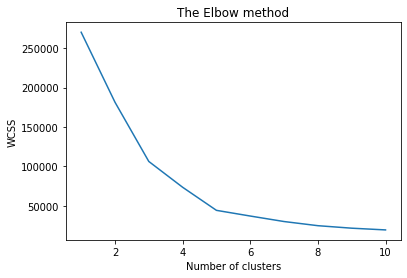

In [ ]:
# find optimal number of clusters using Elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  # to avoid k-means random initialization trap
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)
  # sum of squares of distances from centroids
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans.cluster_centers_
[[55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


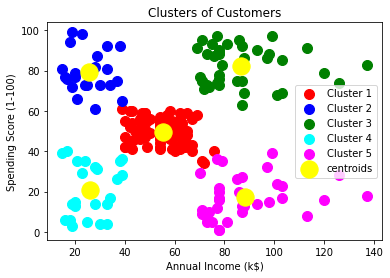

In [ ]:
# clearly there is sudden drop from 3 to 5 and not much increase after it, hence we choose 5
# Training the K-Means model on the dataset, init to avoid random initialization trap( wrongly chosen clusters)
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=0)
ymeans=kmeans.fit_predict(X)
plt.scatter(X[ymeans==0, 0],X[ymeans==0, 1],s=100, c='red',label= 'Cluster 1')
plt.scatter(X[ymeans==1, 0],X[ymeans==1, 1],s=100, c='blue',label= 'Cluster 2')
plt.scatter(X[ymeans==2, 0],X[ymeans==2, 1],s=100, c='green',label= 'Cluster 3')
plt.scatter(X[ymeans==3, 0],X[ymeans==3, 1],s=100, c='cyan',label= 'Cluster 4')
plt.scatter(X[ymeans==4, 0],X[ymeans==4, 1],s=100, c='magenta',label= 'Cluster 5')
print('kmeans.cluster_centers_')
print(kmeans.cluster_centers_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300, c='yellow', label='centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Hierarchial Clustering

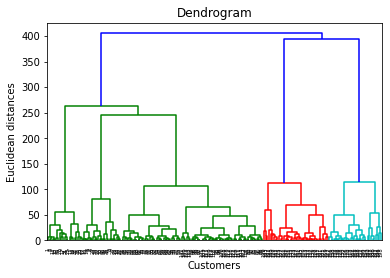

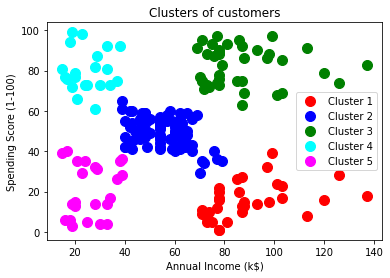

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/sample_data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

# ward- minimizes the variance of the clusters being merged.
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
# select vertical longest line s.t. it is not cut by any horizontal line. after finding such line draw a horizonntal line at middle of that 
# line and number of vertical lines it cuts is chosen as optimal number of clusters.


# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()